# Initial Exploration

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


df = pd.read_csv('data/kc_house_data.csv')

In [1]:
#Use if want to only look at wealthy vs not neighborhoods
#df.groupby('zipcode')['price'].sum().sort_values(ascending = False)

#Want to look at grade in each zipcode
#df.groupby(['grade', 'zipcode'])['id'].count().sort_values(ascending = False)

df.isna().sum()

NameError: name 'df' is not defined

In [40]:
df_num = df.drop(['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'zipcode', 'lat', 'long'], axis = 1)

<AxesSubplot:>

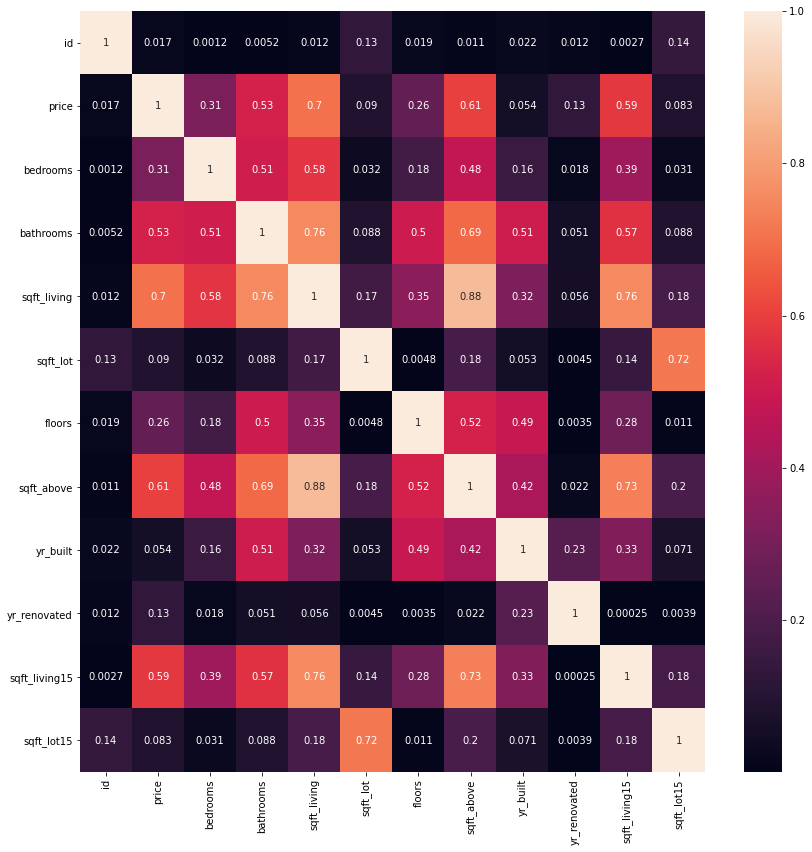

In [41]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_num.corr().abs(), annot = True)

## Test Function

### sklearn version

In [60]:
#Should I add in cross-evaluation for MSE??
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X_train, y_train], axis = 1)
#     sns.pairplot(combine)
#     plt.show()
    
    #Makes model
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    #Grabs predictions
    train_predict = linreg.predict(X_train)
    test_predict = linreg.predict(X_test)
    
    #Prints R^2
    print("Train R2: " + str(r2_score(y_train, train_predict)))
    print("Test R2: " + str(r2_score(y_test, test_predict)))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    
    #Also untested <3
    #Prints Jarque-Bera value if needed - still normality
    if len(X_train) > 2000:
        jb_test = stats.jarque_bera(X_train)
        print("Training Jarque-Bera value: " + str(jb_test.statistic))
    
    #Test for Heteroskedasticity
    print('Test for Heteroskedasticity')
    model = Ridge()
    visualizer = ResidualsPlot(model, ax = axes[1])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    #Haven't actually tested a return, but should work?
    #return X_train, X_test, y_train, y_test, linreg

### statsmodel version

In [59]:
# NO! train test split - not sure if it works with statsmodel? only ever did it with sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.pairplot(combine)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X)
    linreg_model = sm.OLS(y, X).fit()
    
    #Grabs predictions
    predict = linreg_model.predict(X)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared))
    
    #Prints MSE
    print("Model MSE: " + str(mean_squared_error(y, predict)))
    
    #Creates residuals
    resid = y - predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(resid, line = 'r', ax = axes[0])
    
    #Test for Heteroskedasticity
    plt.scatter(predict, resid)
    plt.axhline(y=0, color = 'red')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.show()
     
    return linreg_model

In [62]:
#Should I add in cross-evaluation for MSE??
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error
from scipy import stats

def model_maker(X, y):
    #Gets figures ready for plotting
    fig, axes = plt.subplots(nrows = 2, figsize = (12,12))
    
    #Splits data in testing and training for evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    #ADD BACK IN IF NEED, SHOULD DO BEFORE CALLING
#     Tests for Linearity/Multicollinearity
#     print('Testing for Linearity and Multicollinearity')
#     combine = pd.concat([X, y], axis = 1)
#     sns.heatmap(abs(combine.corr()), annot = True)
#     plt.show()
    
    #Makes model
    X_const = sm.add_constant(X_train)
    linreg_model = sm.OLS(y_train, X_train).fit()
    
    #Grabs predictions
    train_predict = linreg_model.predict(X_train)
    test_predict = linreg_model.predict(X_test)
    
    #Prints R^2
    print("Model R2: " + str(linreg_model.rsquared_adj))
    
    #Prints MSE
    print("Train MSE: " + str(mean_squared_error(y_train, train_predict)))
    print("Test MSE: " + str(mean_squared_error(y_test, test_predict)))
    
    #Creates residuals
    train_resid = y_train - train_predict
    test_resid = y_test - test_predict
    
    #Test for normality
    print('Test for Normality')
    sm.qqplot(train_resid, line = 'r', ax = axes[0])
    
    #Test for Heteroskedasticity
    plt.scatter(train_predict, train_resid, label = 'Train')
    plt.scatter(test_predict, test_resid, label='Test')
    plt.axhline(y=0, color = 'red')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()
     
    return linreg_model